# Homework: Python Basics

## Team Name: team_bio_2

## Team Members: Jossef Guajardo, Orlando Josué Solórzano Toala, Nardy Sallo (the other two didn't contribute)

## Instructions and initial task:

The purpose of this assignment is to find the characteristic index of the turbulence energy cascade of a snapshot taken from a subsonic turbulence simulation. The spectrum scales, so for simplicity we will work in code units.

You should upload the following simulation file (turbulence_sub_hr.vtk) to your Drive:

https://github.com/ciencialatitud0/EPIC_2/tree/main/Day1/Basics-2/homework/homework_data

**Please work with your team mates and produce a single python notebook per group.** When you finish, ask one of the group members to place the notebook onto the EPIC 2 github repository (we recommend to fork the repository, add the notebook to the Day1/Basics-2/homework/ in your account, and then do a pull request).

To get you started I have added a few lines to open the VTK simulation file and make a plot. First, you should reproduce this on Google Colab.

### Reference: 

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2d_python_II_CFDdata.ipynb

In [1]:
# First let's mount our Drive folder:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Then, we need to install pyvista

!pip install pyvista

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 3.7 MB/s 
     |████████████████████████████████| 79.3 MB 126 kB/s 


In [3]:
# Import useful libraries

import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Indicate the working directory

input_directory="/content/drive/My Drive/Colab Notebooks/homework_data/"
file_name = "turbulence_sub_hr.vtk"

In [5]:
input_directory

'/content/drive/My Drive/Colab Notebooks/homework_data/'

In [6]:
# Read the mesh

mesh = pv.read(input_directory+file_name)

print(mesh)

RectilinearGrid (0x7fa14179cbb0)
  N Cells:	40000
  N Points:	40401
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	201, 201, 1
  N Arrays:	5



In [7]:
# Now, we read all the scalar and vector quantities

rho = pv.get_array(mesh, "rho", preference = 'cell') # density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') # x velocity component in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') # y velocity component in code units
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell') # x magnetic field component in code units
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell') # y magnetic field component in code units

In [8]:
# The above arrays are 1D, so we need to make them 2D
# To check you can run: print(rho.shape)

rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_2D = Bx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [9]:
# Create a 2D grid using metadata information

x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)

X, Y = np.meshgrid(x, y)

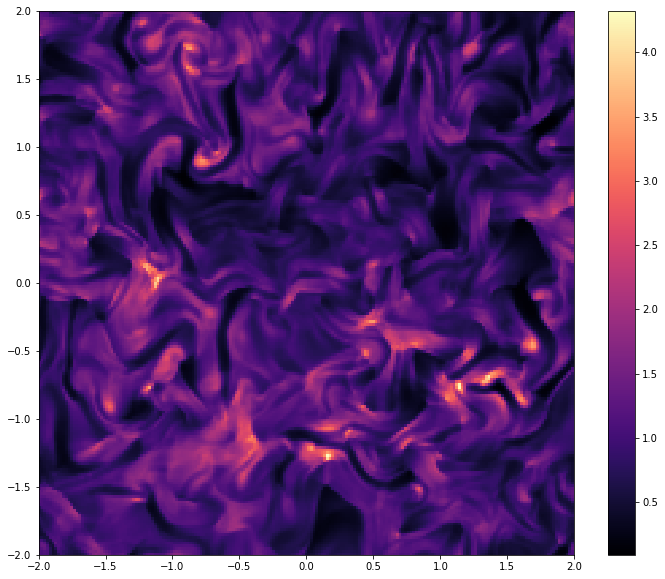

In [10]:
# And we are ready to interpolate our data onto the mesh:

plt.figure(figsize = (12,10))

Z = plt.pcolor(X, Y, rho_2D, cmap = 'magma')

plt.colorbar(Z)

plt.show()

# TASK 1:

Calculate the kinetic energy density and make a 2D map of it. Recall that:

$E_k =\frac{1}{2}\rho\,v^2$,

so you need to calculate the velocity modulus first:

$v=\sqrt{v_x^2+v_y^2}$.

In [12]:
v = np.sqrt( vx1_2D**2 + vx2_2D**2)
v

pyvista_ndarray([[0.59600145, 0.52155423, 0.7290649 , ..., 0.5602668 ,
                  0.6014825 , 0.61232275],
                 [0.7088892 , 0.67884374, 0.86650383, ..., 0.7975744 ,
                  0.73047715, 0.7313515 ],
                 [0.8939986 , 0.8518758 , 0.8960473 , ..., 0.71528345,
                  0.77178454, 0.83584046],
                 ...,
                 [0.5757084 , 0.49297193, 0.5808827 , ..., 0.57576686,
                  0.61023575, 0.62512624],
                 [0.5744969 , 0.46569538, 0.5905057 , ..., 0.4837701 ,
                  0.53976834, 0.6075393 ],
                 [0.5891001 , 0.4891283 , 0.63911366, ..., 0.47917068,
                  0.5569635 , 0.6098672 ]], dtype=float32)

In [13]:
E_K = (1/2)*rho_2D*(v**2)
E_K

pyvista_ndarray([[0.19386747, 0.14330217, 0.29517323, ..., 0.15839921,
                  0.19030066, 0.20850527],
                 [0.27862623, 0.24633174, 0.42856914, ..., 0.27110457,
                  0.29138178, 0.30036074],
                 [0.4642757 , 0.4385434 , 0.5250159 , ..., 0.18649809,
                  0.36030903, 0.40962037],
                 ...,
                 [0.21077822, 0.14722496, 0.19404925, ..., 0.20083833,
                  0.2401307 , 0.2616921 ],
                 [0.19643609, 0.12020525, 0.1936307 , ..., 0.1300164 ,
                  0.17056358, 0.23008747],
                 [0.19250162, 0.12800974, 0.22560519, ..., 0.12144075,
                  0.17324623, 0.21663463]], dtype=float32)

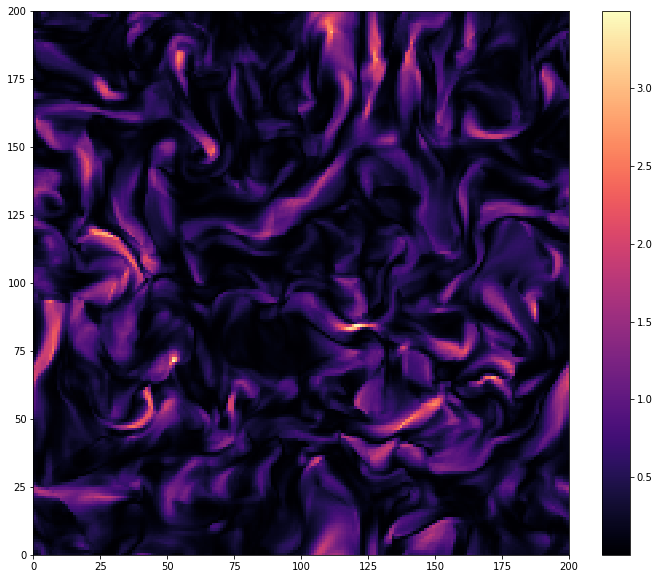

In [14]:
plt.figure(figsize = (12,10))

kinetic_energy = plt.pcolor(E_K, cmap = 'magma')

plt.colorbar(kinetic_energy)

plt.show()

# TASK 2: 

Carry out the 2D Fast Fourier Transform of the kinetic energy image that you produced above, and make a map of it.


### Reference:
https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2b_fourier_transforms.ipynb

In [18]:
# Fourier transform:
fourier_Ek = np.fft.fft2(E_K)

# Copy the Fourier signal
filtered_Ek = fourier_Ek.copy()

# Inverse Fourier transform
ifourier_Ek = np.fft.ifft2(fourier_Ek)

# Shift the signal so that the low frequencies are at the centre\
fourier_Ekk = np.fft.fftshift(fourier_Ek)

# Frequencies:
d_spacing = 0.001
freqs_x = np.fft.fftfreq(E_K.shape[0], d = d_spacing)
freqs_y = np.fft.fftfreq(E_K.shape[1], d = d_spacing)

# Frequency mesh:
freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

# Norm of Fourier transform:
norm_fourier_Ek = np.abs(fourier_Ek)
norm_fourier_Ekk = np.abs(fourier_Ekk)

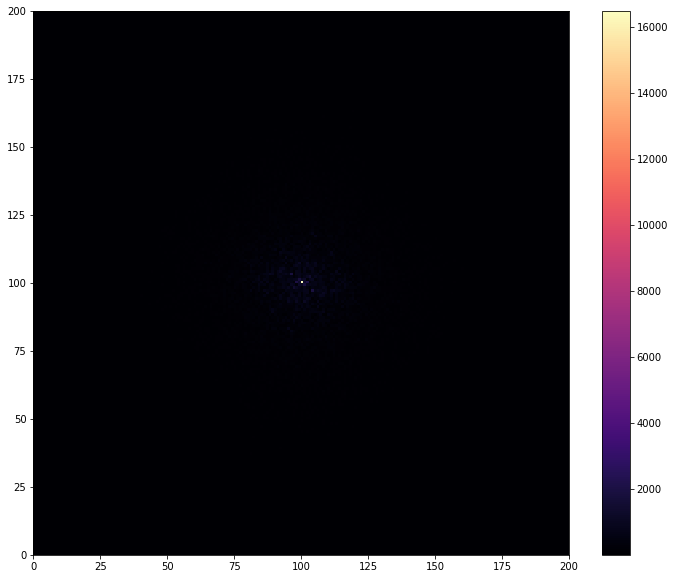

In [16]:
plt.figure(figsize = (12,10))

fourier_map = plt.pcolor(norm_fourier_Ekk, cmap = 'magma')

plt.colorbar(fourier_map)

plt.show()

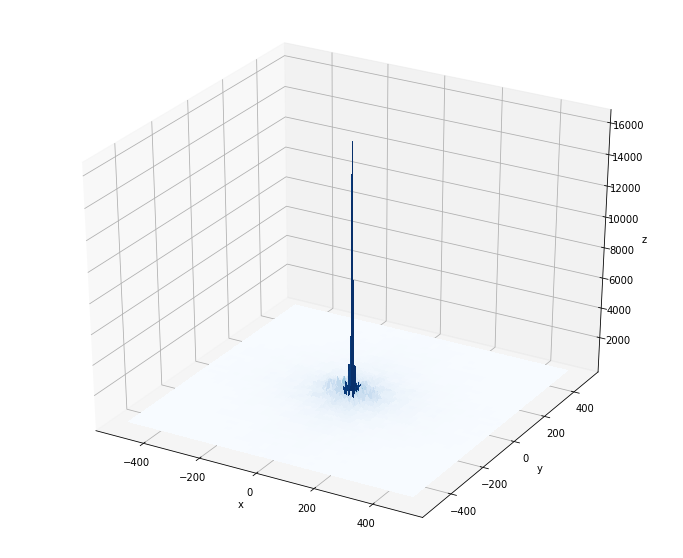

In [22]:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, norm_ShiftFourier_2D, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface
surf = ax.plot_surface(freqs_X, freqs_Y, norm_fourier_Ekk, cmap = "Blues", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

# TASK 3: 

Use the function below to produce a 1D Fourier spectrum from the 2D Fourier image that you produced above. Make a log-log plot of the 1D Fourier spetrum. You should get a plot similar to the sketch shown here (in the "cascade of turbulence" section):

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2c_python_II_lecture.ipynb

### Note:
The GetPSD1D() function calculates the azimuthal summation and will allow you to test whether the spectrum of this turbulence snaphot follows Kolmogorov or not.





In [ ]:
from scipy import ndimage

In [ ]:
#===================================================================
# Get PSD 1D (total radial power spectrum)
#===================================================================
def GetPSD1D(psd2D):
    h  = psd2D.shape[0]
    w  = psd2D.shape[1]
    wc = w//2
    hc = h//2

    # create an array of integer radial distances from the center
    Y, X = np.ogrid[0:h, 0:w]
    r    = np.hypot(X - wc, Y - hc).astype(int)

    # SUM all psd2D pixels with label 'r' for 0<=r<=wc
    # NOTE: this will miss power contributions in 'corners' r>wc
    psd1D = ndimage.sum(psd2D, r, index=np.arange(0, wc))

    return psd1D
#===================================================================

# Taken from: https://medium.com/tangibit-studios/2d-spectrum-characterization-e288f255cc59

In [ ]:
fourier_1d = GetPSD1D(norm_fourier_Ekk)

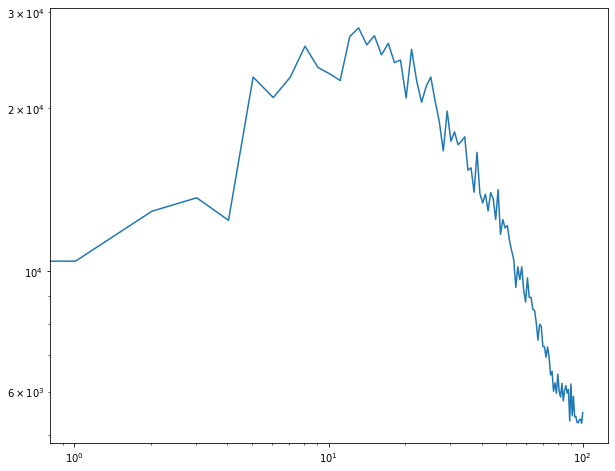

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
a = np.linspace(0, fourier_1d.shape[0], fourier_1d.shape[0])
ax.loglog(a, fourier_1d)
plt.show()

# TASK 4: 

Now that you have produced the 1D Fourier spectrum of the kinetic energy, label the plot identifying the turbulence generation, transfer, and dissipation regions. Finally, carry out a linear regression considering only the points associated with the inertial range. Does the spectrum follow Kolmogorov spectrum, $E_k \propto k^{-\frac{5}{3}}$?

### Reference:

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-1/Sesion_1_Data_analysis_with_PythonI.ipynb

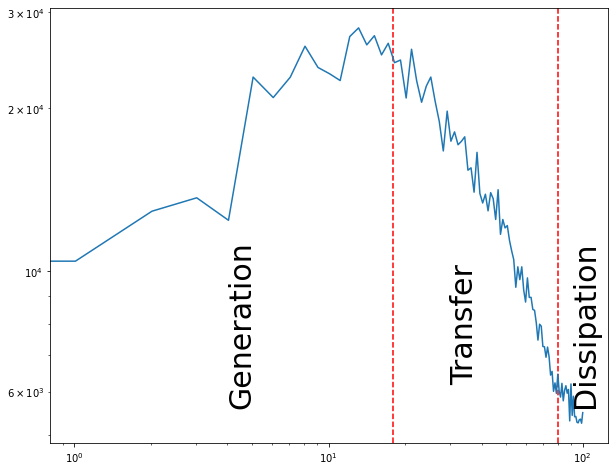

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.axvline(x= 18, linestyle = '--', c = 'red')
ax.axvline(x= 80, linestyle = '--', c = 'red')
ax.text(0.4e1, 0.8e4, "Generation", rotation=90, va='center', fontsize=30)
ax.text(0.3e2, 0.8e4, "Transfer", rotation=90, va='center', fontsize=30)
ax.text(0.9e2, 0.8e4, "Dissipation", rotation=90, va='center', fontsize=30)
a = np.linspace(0, fourier_1d.shape[0], fourier_1d.shape[0])
ax.loglog(a, fourier_1d)
plt.show()

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
#1. define a function to fit to the data
def E_func(k, a, cte):
    return cte * k **(-a)
#2.fit function:
popt, pcov = curve_fit(E_func, a[18:80], fourier_1d[18:80])

In [ ]:
popt

array([8.75057591e-01, 3.41802896e+05])

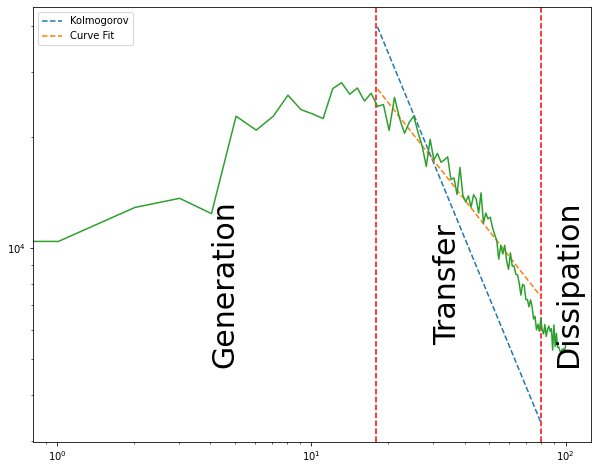

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.axvline(x= 18, linestyle = '--', c = 'red')
ax.axvline(x= 80, linestyle = '--', c = 'red')
ax.text(0.4e1, 0.8e4, "Generation", rotation=90, va='center', fontsize=30)
ax.text(0.3e2, 0.8e4, "Transfer", rotation=90, va='center', fontsize=30)
ax.text(0.9e2, 0.8e4, "Dissipation", rotation=90, va='center', fontsize=30)
plt.plot(a[18:80], E_func(a[18:80], 5/3,5e6), linestyle = '--', label='Kolmogorov')
plt.plot(a[18:80], E_func(a[18:80], popt[0],popt[1]), linestyle = '--', label='Curve Fit') 
ax.loglog(a, fourier_1d)
plt.legend()
plt.show()

From the graphics we can see it does not follow Kolmogorov spectrum.